<a href="https://colab.research.google.com/github/Evandro72/SentimentAnalysis2/blob/main/Sentiment_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 5.3 MB/s 
     |████████████████████████████████| 291 kB 45.6 MB/s 
     |████████████████████████████████| 1.6 MB 32.5 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=2217bd2ca5bff3a01446b62f92c6f58f4c406f939cc0df0b99fe14183d9cc278
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [3]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import random
import nltk
import swifter

nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Reading CSV File
df = pd.read_csv('Tweets.csv')

# English

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Filtering English Tweets
Englishdf = df[df['Language'] == 'English']
Englishdf = Englishdf.reset_index()

for index in range(len(Englishdf)):
    Sentiment_Scores = SentimentIntensityAnalyzer().polarity_scores(Englishdf.loc[index, 'Cleaned_Tweet'])
    
    if Sentiment_Scores['compound'] >= 0.05:
        Englishdf.loc[index, 'Sentiment'] = 'Positive'    
    elif Sentiment_Scores['compound'] <= -0.05:
        Englishdf.loc[index, 'Sentiment'] = 'Negative'    
    else:    
        Englishdf.loc[index, 'Sentiment'] = 'Neutral'            

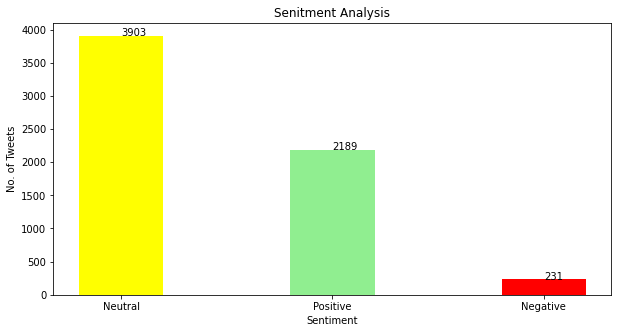

In [6]:
# Sentiment Analysis Plot

import matplotlib.pyplot as plt
import numpy as np
 
# creating the dataset
mylabels = Englishdf['Sentiment'].value_counts().keys().tolist()
myValues = Englishdf['Sentiment'].value_counts().tolist()

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, 
        myValues, 
        color = ['yellow', 'lightgreen', 'red'],
        width = 0.4)
 
for i in range(len(mylabels)):
    plt.text(i, myValues[i], myValues[i])
    
plt.xlabel("Sentiment")
plt.ylabel("No. of Tweets")
plt.title("Senitment Analysis")
plt.show()

# Italian 

In [8]:
pip install feel_it

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.4 MB/s 
     |████████████████████████████████| 880 kB 45.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=6b05f50f3fe201585248adc608a881b69e64e9a89bdc14e867dd685ba794c852
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [9]:
from feel_it import EmotionClassifier, SentimentClassifier

# Filtering Italian Tweets
Italiandf = df[df['Language'] == 'Italian']
Italiandf = Italiandf.reset_index()

sentiment_classifier = SentimentClassifier()

for index in range(len(Italiandf)):
    Sentiment = sentiment_classifier.predict([Italiandf.loc[index, 'Cleaned_Tweet']])
    Italiandf.loc[index, 'Sentiment'] = Sentiment[0]    

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

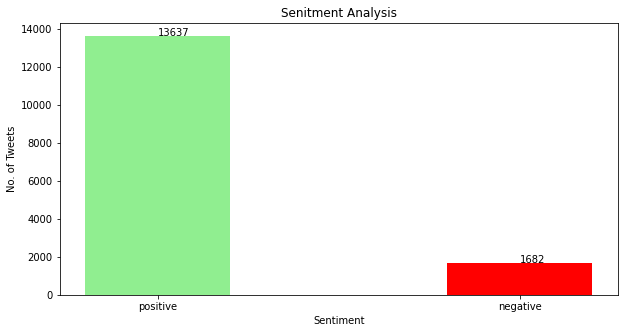

In [10]:
# Sentiment Analysis Plot

import matplotlib.pyplot as plt
import numpy as np
 
# creating the dataset
mylabels = Italiandf['Sentiment'].value_counts().keys().tolist()
myValues = Italiandf['Sentiment'].value_counts().tolist()

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, 
        myValues, 
        color = ['lightgreen', 'red'],
        width = 0.4)
 
for i in range(len(mylabels)):
    plt.text(i, myValues[i], myValues[i])
    
plt.xlabel("Sentiment")
plt.ylabel("No. of Tweets")
plt.title("Senitment Analysis")
plt.show()

# Cited Words

In [17]:
Cited_Words = ['radio']

In [11]:
# Cited_Words = ['radio', 'blog', 'festival']

In [18]:
# Creating a function to generate N-Grams
def generate_ngrams(text, WordsToCombine):
    words = text.split()
    output = []  
    for i in range(len(words)- WordsToCombine+1):
        output.append('_'.join(words[i:i+WordsToCombine]))
        
    return ' '.join(output)


### English

In [19]:
for index in range(len(Englishdf)):
    for word in Cited_Words:        
        if str(' ' + word + ' ') in  str(Englishdf.loc[index, 'Cleaned_Tweet']).lower():
            N_Grams = generate_ngrams(
                Englishdf.loc[index, 'Cleaned_Tweet'].lower().replace(word, '').replace('  ', ' '),
                3
            )
            Englishdf.loc[index, word] = N_Grams    
        else:
            Englishdf.loc[index, word] = '-'      
        
# Saving to CSV
Englishdf.to_csv('English.csv', index=False)

### Italian

In [20]:
for index in range(len(Italiandf)):
    for word in Cited_Words:        
        if str(' ' + word + ' ') in  str(Italiandf.loc[index, 'Cleaned_Tweet']).lower():
            N_Grams = generate_ngrams(
                Italiandf.loc[index, 'Cleaned_Tweet'].lower().replace(word, '').replace('  ', ' '),
                3
            )
            Italiandf.loc[index, word] = N_Grams    
        else:
            Italiandf.loc[index, word] = '-'      
        
# Saving to CSV
Italiandf.to_csv('Italian.csv', index=False)

## English Word Cloud

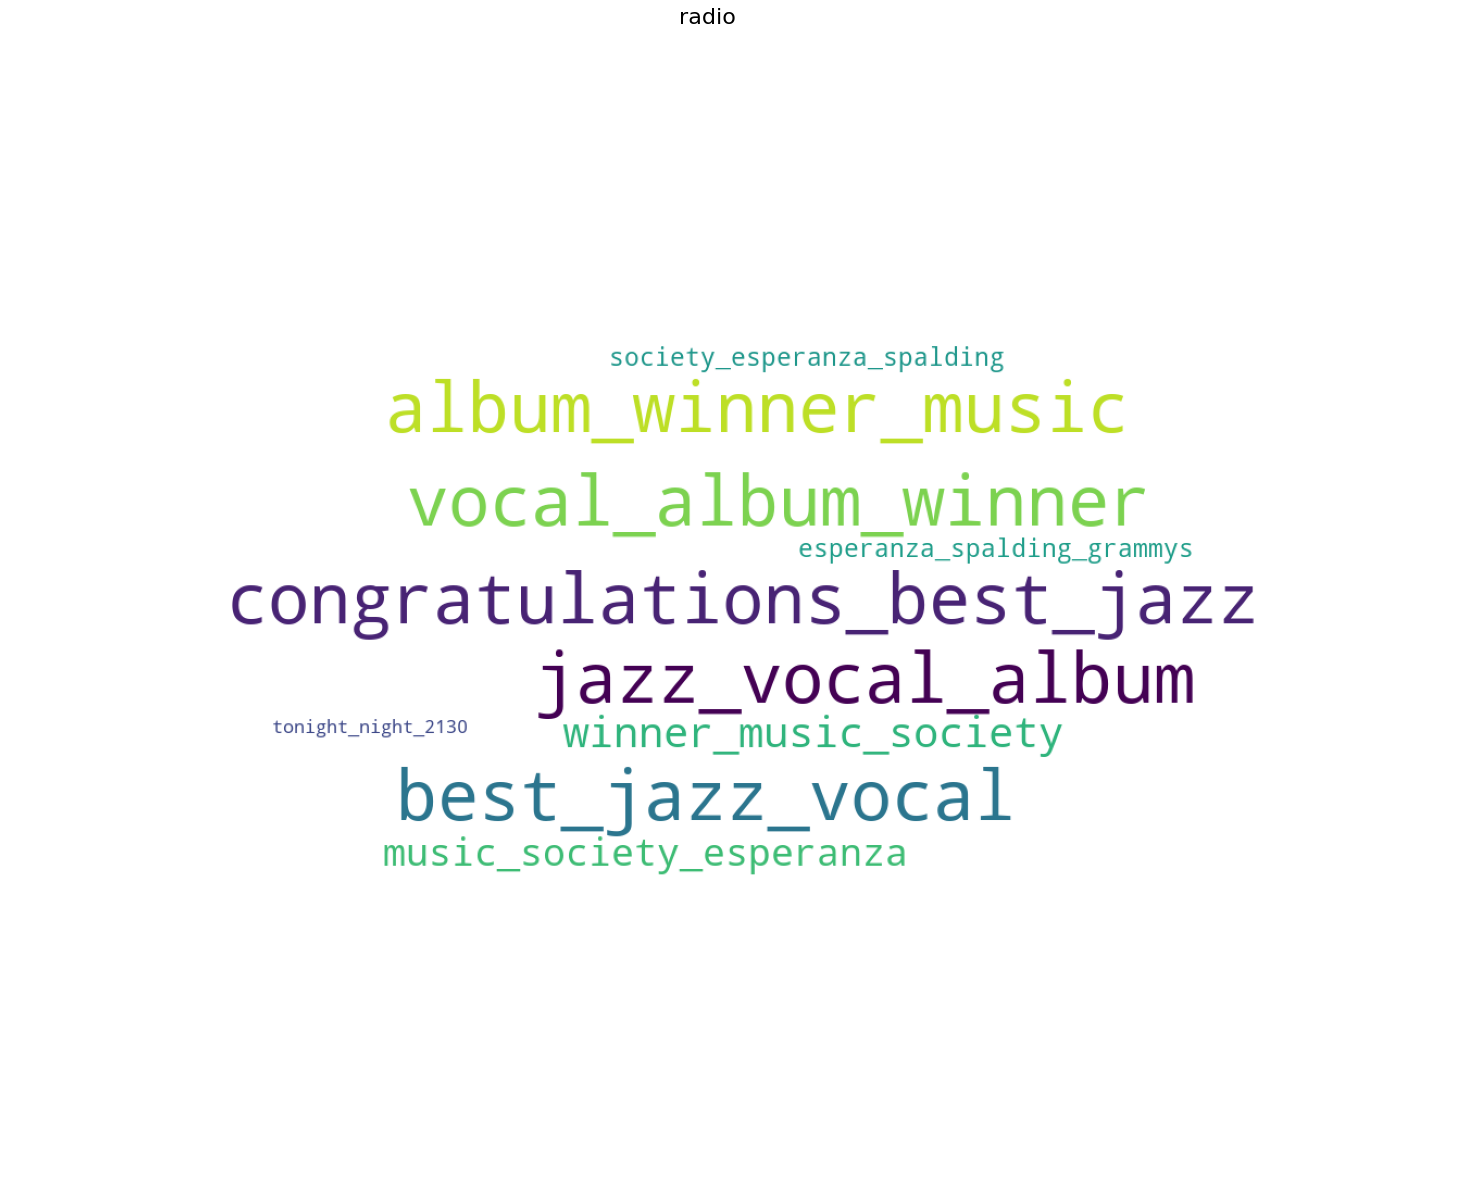

In [21]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

for word in Cited_Words:
    Word_List = Englishdf[word].tolist()
    Word_List = [i for i in Word_List if i != '-']
    
    wordcloud = WordCloud(
                    width = 2000, 
                    height = 1334, 
                    random_state=1, 
                    background_color='white',                 
                    max_words = 10,
                    mask=mask,
                    collocations=False, 
                    normalize_plurals=False
                ).generate(' '.join(Word_List))

    fig = plt.figure(figsize=(25, 17), dpi=80)
    fig.suptitle(word, fontsize=20)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()            

## Italian Word Cloud

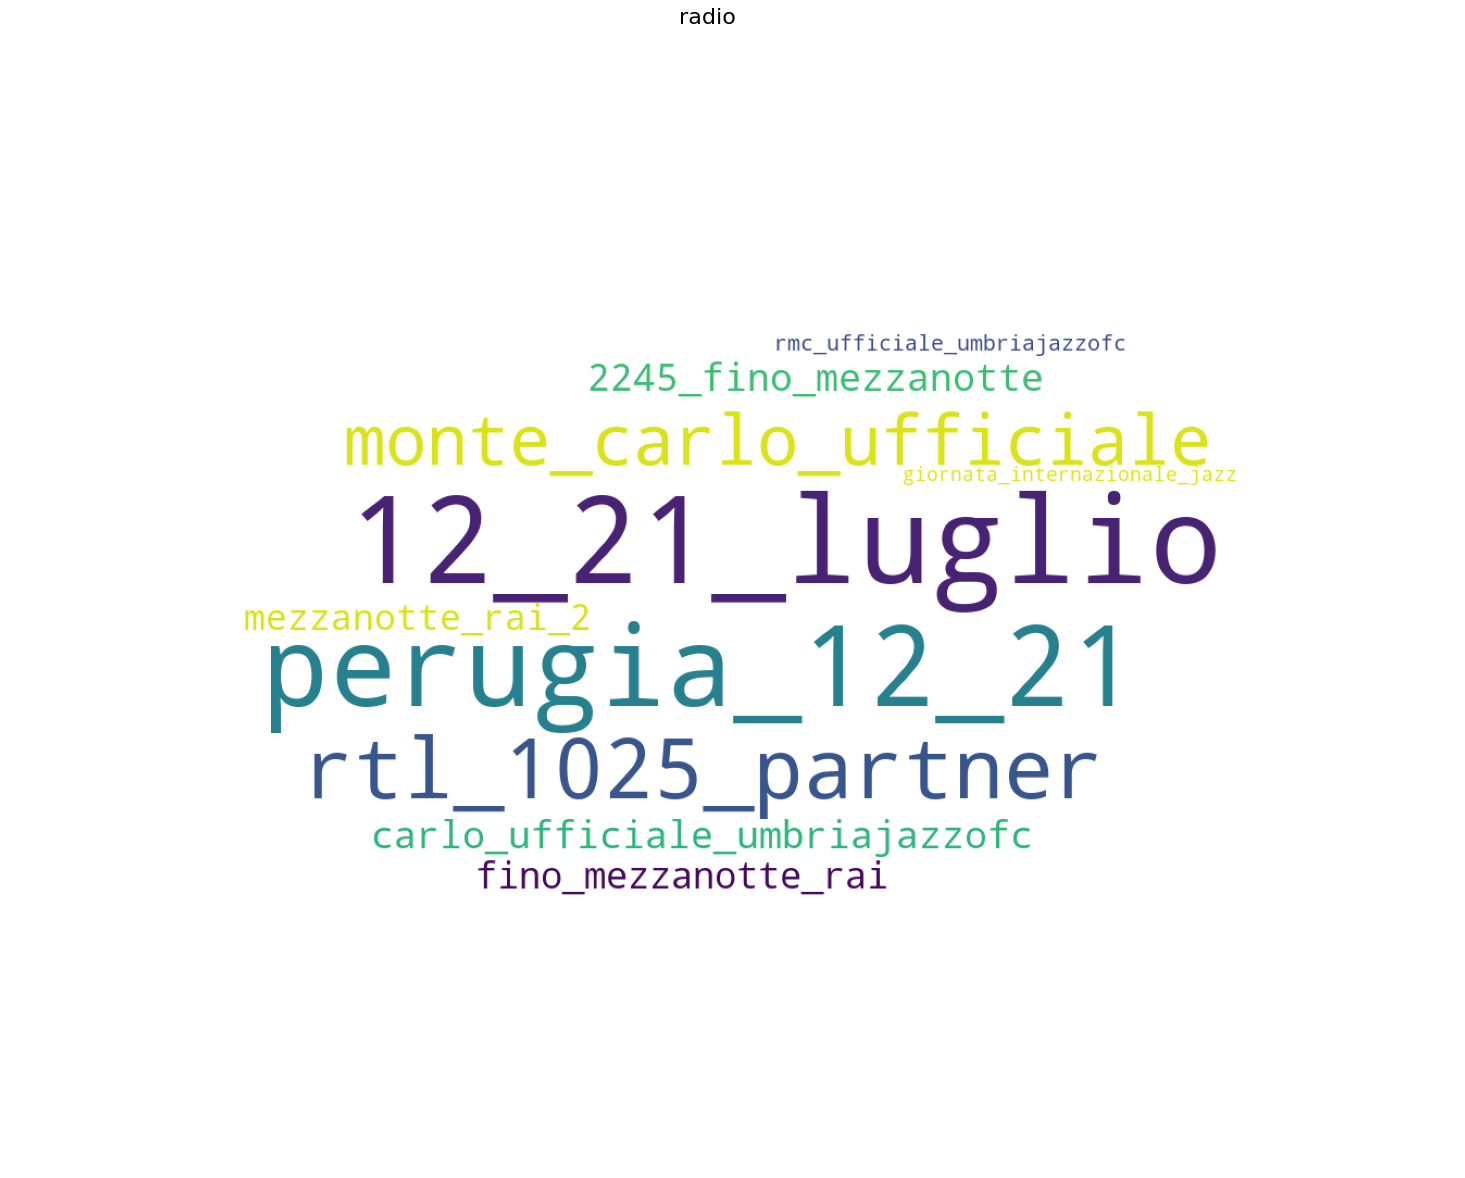

In [22]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

for word in Cited_Words:
    Word_List = Italiandf[word].tolist()
    Word_List = [i for i in Word_List if i != '-']
    
    wordcloud = WordCloud(
                    width = 2000, 
                    height = 1334, 
                    random_state=1, 
                    background_color='white',                 
                    max_words = 10,
                    mask=mask,
                    collocations=False, 
                    normalize_plurals=False
                ).generate(' '.join(Word_List))

    fig = plt.figure(figsize=(25, 17), dpi=80)
    fig.suptitle(word, fontsize=20)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()            